In [138]:
import numpy as np
import pymc3 as pm
import arviz as az
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [170]:
mixed_model = az.from_netcdf('trace/pk_mixed_model.NC')
reg = az.from_netcdf('trace/pk_regression.NC')
df = pd.read_csv('data/test.csv', index_col = 0)
df.index = df.index.rename('subject')
df=df.reset_index()

In [ ]:
draws = reg.posterior.conc.stack(z=['chain','draw','conc_dim_0']).to_dataframe()

reg_model_summary = draws.groupby('conc_dim_0').agg([('reg_mean',np.mean), 
                                                     ('reg_lower', lambda x: np.quantile(x,0.025)),
                                                     ('reg_upper', lambda x: np.quantile(x, 0.975))])

reg_model_summary.columns = reg_model_summary.columns.droplevel()

In [ ]:
draws = mixed_model.posterior.conc.stack(z=['chain','draw','conc_dim_0']).to_dataframe()


mixed_model_summary = draws.groupby('conc_dim_0').agg([('mixed_mean',np.mean), 
                                                     ('mixed_lower', lambda x: np.quantile(x,0.025)),
                                                     ('mixed_upper', lambda x: np.quantile(x, 0.975))])

mixed_model_summary.columns = mixed_model_summary.columns.droplevel()

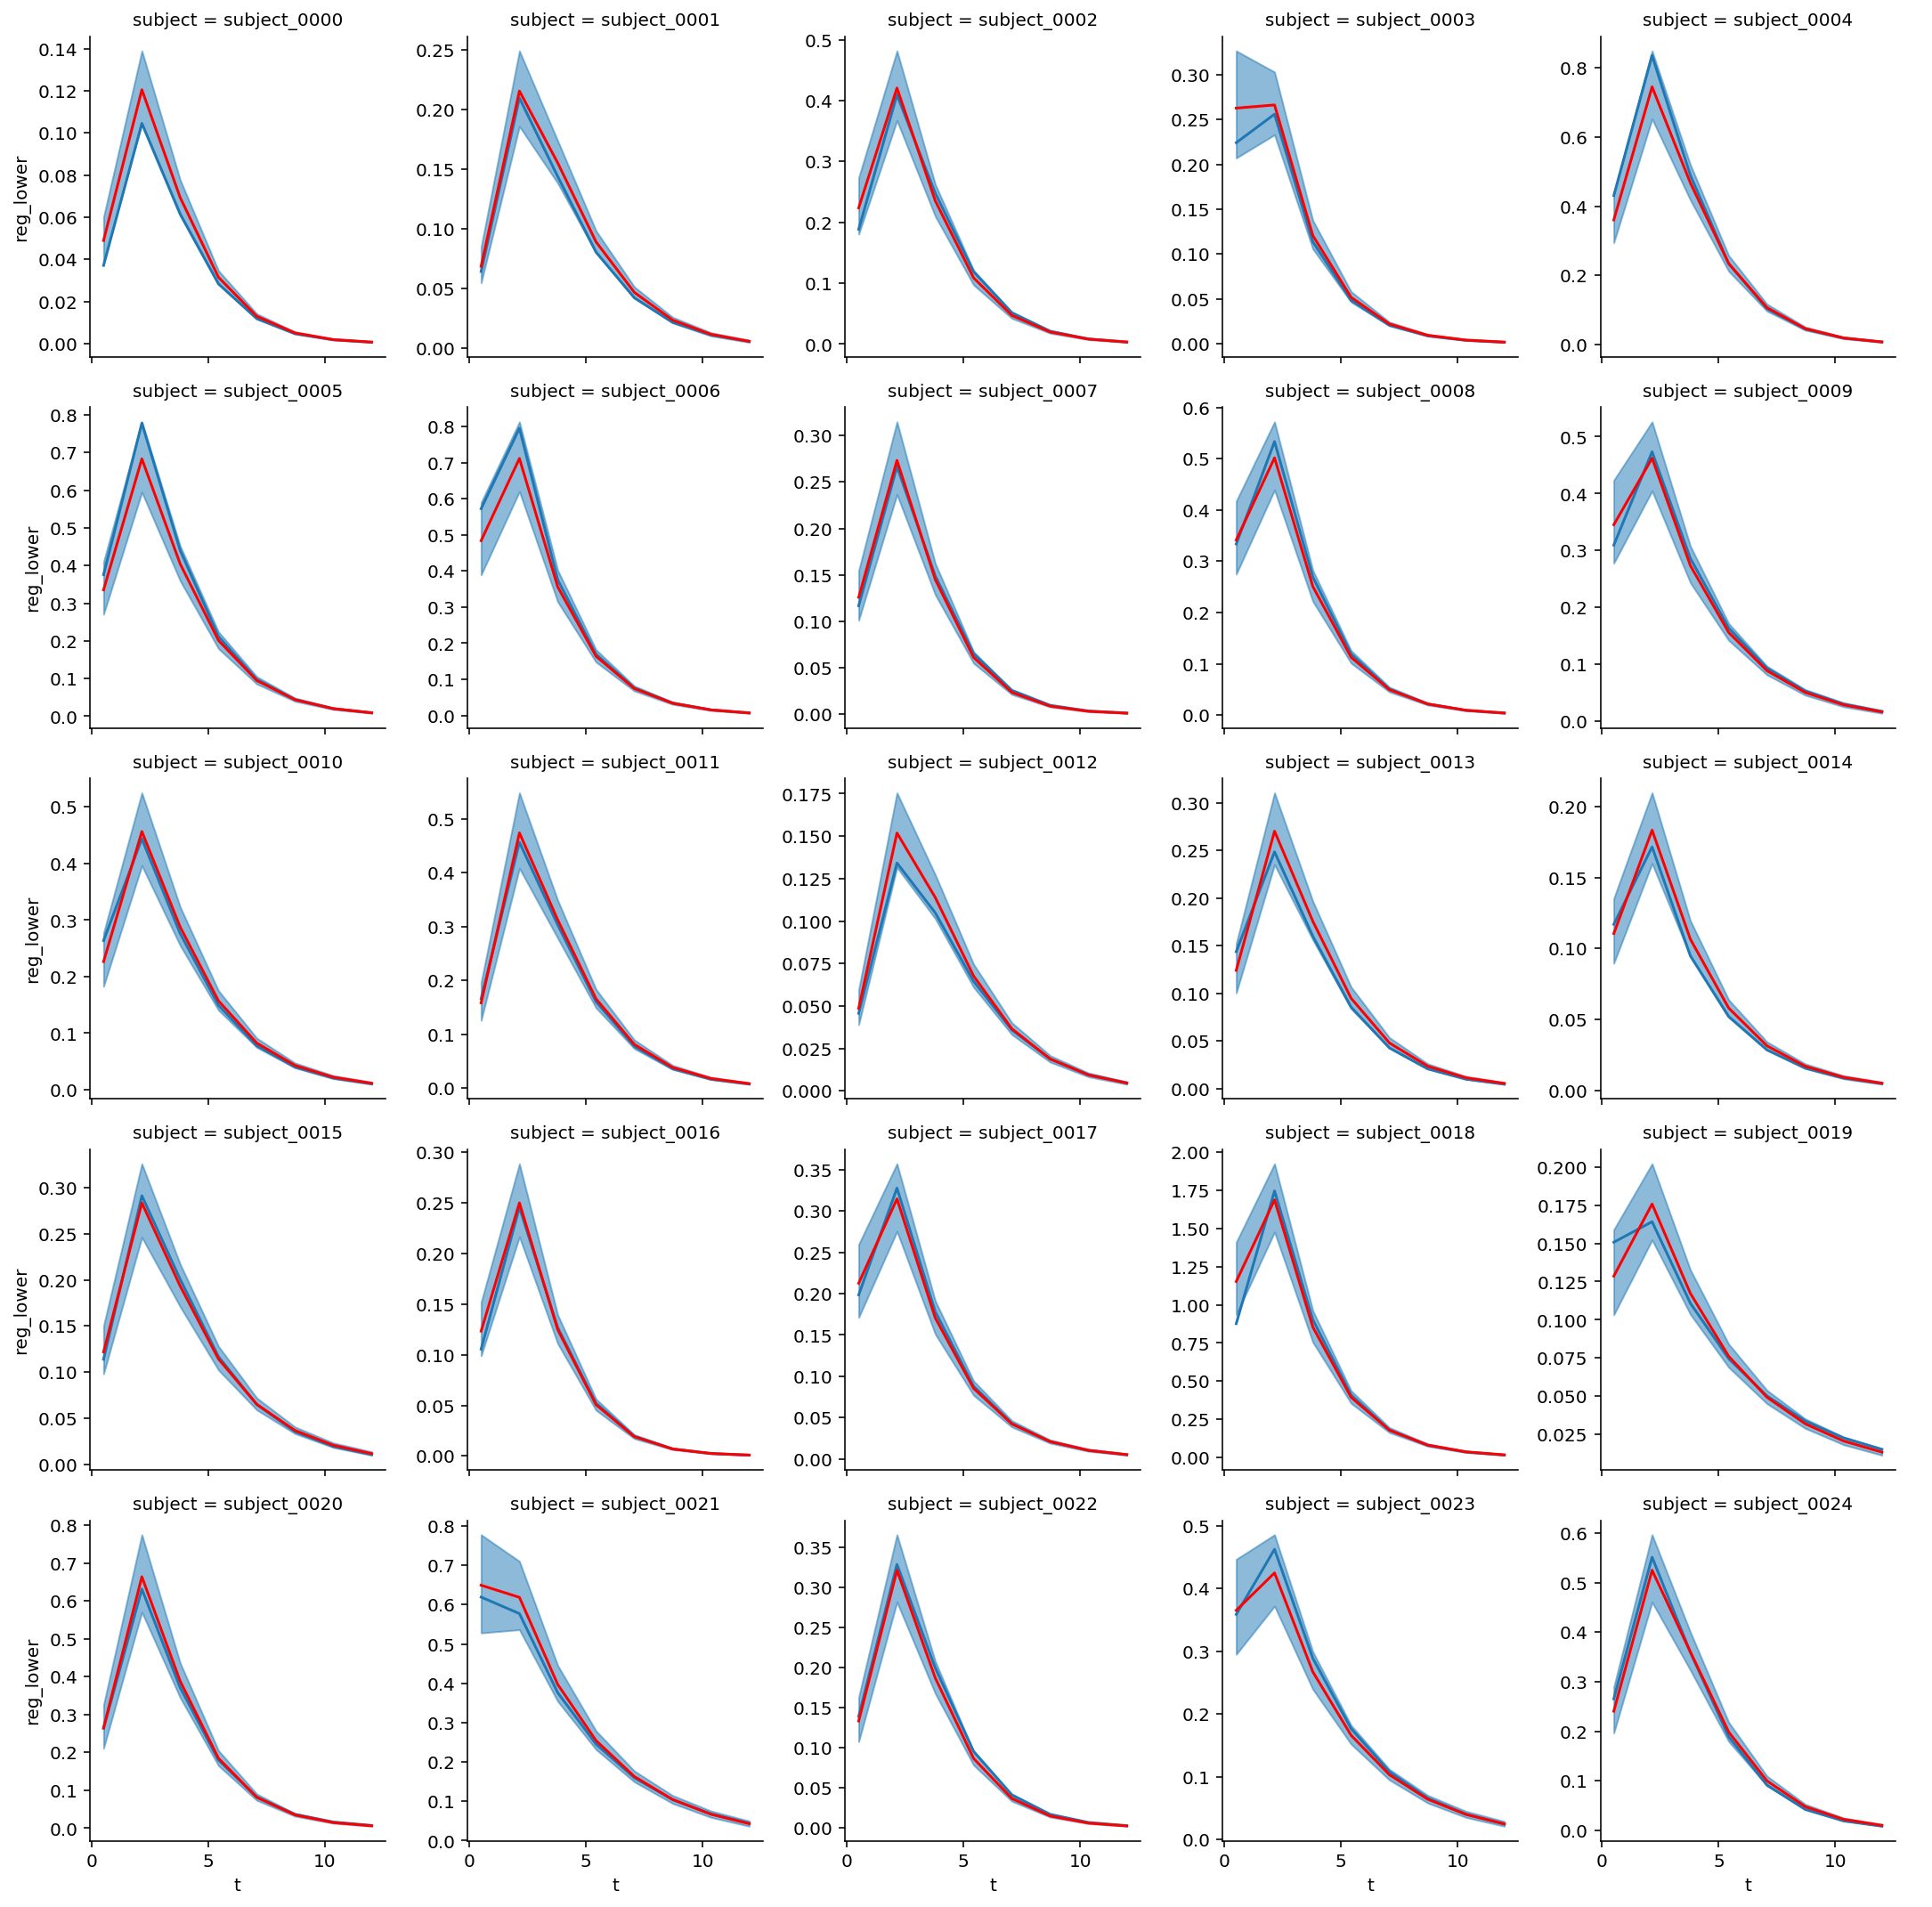

In [175]:
df = df.join(reg_model_summary).join(mixed_model_summary)

g = sns.FacetGrid(data = df, col='subject', col_wrap=5, sharey = False)

g.map_dataframe(sns.lineplot, 't','y', color = 'C0')
g.map_dataframe(sns.lineplot, 't','reg_mean', color= 'r')
# g.map_dataframe(sns.lineplot, 't','mixed_model', color= 'purple')
g.map_dataframe(plt.fill_between, 't', 'reg_lower','reg_upper', alpha = 0.5)
g.add_legend()

,subject,t,Cl,ka,ke,x_0,x_1,x_2,x_3,delay,y,y_obs,reg_mean,reg_lower,reg_upper,mixed_mean,mixed_lower,mixed_upper
0,subject_0000,0.500000,11.959142,0.819121,0.620905,-1.352203,0.746388,0.0,1.0,0.298219,0.037107,0.045855,0.048929,0.039161,0.060073,0.048338,0.038749,0.059426
1,subject_0000,2.142857,11.959142,0.819121,0.620905,-1.352203,0.746388,0.0,1.0,0.298219,0.104510,0.109651,0.120501,0.104458,0.138906,0.121278,0.104464,0.140959
2,subject_0000,3.785714,11.959142,0.819121,0.620905,-1.352203,0.746388,0.0,1.0,0.298219,0.061410,0.069063,0.069307,0.061770,0.077708,0.069560,0.061633,0.078161
3,subject_0000,5.428571,11.959142,0.819121,0.620905,-1.352203,0.746388,0.0,1.0,0.298219,0.028320,0.037058,0.031464,0.028428,0.034605,0.031500,0.028376,0.034738
4,subject_0000,7.071429,11.959142,0.819121,0.620905,-1.352203,0.746388,0.0,1.0,0.298219,0.011820,0.014789,0.012947,0.011756,0.014156,0.012939,0.011719,0.014125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,subject_0024,5.428571,2.016054,0.506168,0.788143,0.509627,1.537854,0.0,0.0,0.167239,0.189171,0.185317,0.198519,0.179516,0.218331,0.192190,0.168469,0.215341
196,subject_0024,7.071429,2.016054,0.506168,0.788143,0.509627,1.537854,0.0,0.0,0.167239,0.091318,0.100179,0.099897,0.090404,0.109485,0.096829,0.086035,0.107829
197,subject_0024,8.714286,2.016054,0.506168,0.788143,0.509627,1.537854,0.0,0.0,0.167239,0.042211,0.046595,0.047897,0.043152,0.052755,0.047205,0.042412,0.052259
198,subject_0024,10.357143,2.016054,0.506168,0.788143,0.509627,1.537854,0.0,0.0,0.167239,0.019050,0.024696,0.022317,0.019728,0.025131,0.022633,0.020007,0.025518
